# SZTUCZNA INTELIGENCJA W CHMURZE

# 4. Udostępnienie, w dowolny sposób, wymagany przez aplikację, możliwości zastosowania modelu/algorytmu w sposób odpowiadający przyjętym założeniom

Model został udostępniony w postaci zapisanej struktury i wag w pliku mobilenet_food101.pth, umieszczonym w folderze projektu na Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = '/content/drive/MyDrive/AI_w_chmurze_projekt/'

Zapisany model to wersja architektury MobileNetV2, przystosowana do klasyfikacji 10 wybranych klas potraw na podstawie zbioru danych Food-101.

Oprócz wag (model_state_dict) plik zawiera również listę klas (classes), co umożliwia późniejsze poprawne interpretowanie wyników.

Model osiągnął bardzo dobre rezultaty - dokładność na zbiorze walidacyjnym wyniosła 86.15%, co świadczy o skutecznym dopasowaniu do zadania klasyfikacji obrazów potraw.

Udostępnienie w tej formie pozwala na jego dalsze wykorzystanie w aplikacjach oraz szybkie wczytanie bez konieczności ponownego trenowania.

### Import Bibliotek

In [3]:
# pytorchowe biblioteki
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

# gotowe modele + transformacje
import torchvision.models as models
import torchvision.transforms as transforms

# Biblioteka obsługująca obrazy
from PIL import Image

In [4]:
!pip freeze > /content/drive/MyDrive/AI_w_chmurze_projekt/requirements_app.txt

### Gradio install: https://www.gradio.app/

In [5]:
!pip install gradio --quiet

In [6]:
# Interfejs Gradio
import gradio as gr

### Załadowanie modelu

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
checkpoint_path = os.path.join(project_path, 'mobilenet_food101.pth')
checkpoint = torch.load(checkpoint_path, map_location=device)

In [9]:
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.last_channel, 10)

model.load_state_dict(checkpoint['model_state_dict'])

model = model.to(device)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [10]:
classes = checkpoint.get('classes', None)

In [11]:
print(classes)
print(len(classes))

['apple_pie', 'chocolate_cake', 'dumplings', 'hamburger', 'ice_cream', 'pad_thai', 'pizza', 'ramen', 'spaghetti_bolognese', 'sushi']
10


### PREDYKCJA

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

def predict(image):
    image = image.convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        probs = F.softmax(outputs, dim=1)
        top_prob, top_idx = torch.max(probs, dim=1)

    class_name = classes[top_idx.item()]
    confidence = top_prob.item() * 100

    return f"{class_name} ({confidence:.2f}%)"


# 5. Wykorzystanie modelu w przykładowej funkcjonalności aplikacji

W ramach projektu przygotowano przykładową funkcjonalność aplikacyjną z wykorzystaniem biblioteki Gradio, która umożliwia użytkownikowi łatwe przetestowanie działania modelu.

Aplikacja przyjmuje obraz potrawy jako dane wejściowe, przetwarza go, a następnie wykorzystuje wcześniej wytrenowany model do klasyfikacji zdjęcia.

Model analizuje obraz i zwraca nazwę rozpoznanej potrawy oraz poziom pewności predykcji w procentach.

Cały proces odbywa się w czasie rzeczywistym, bez potrzeby ręcznej obsługi kodu, co czyni funkcjonalność przystępną również dla użytkowników nietechnicznych.

Dzięki zastosowaniu Gradio stworzono interfejs webowy, który może działać lokalnie w środowisku Google Colab lub zostać udostępniony publicznie przez link gradio.live.

Interfejs ten stanowi dowód praktycznego wykorzystania modelu i jego integracji z warstwą użytkową aplikacji.

### Uruchamiamy aplikacje

In [13]:
gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Rozpoznawanie jedzenia"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3cc1d512b790a74855.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Wykonajmy kilka testów:

TEST 1:
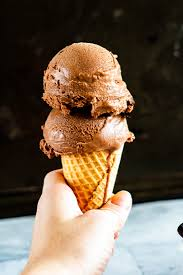

TEST 2:
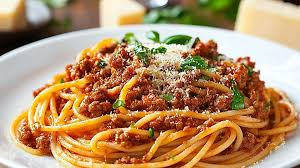

TEST 3:
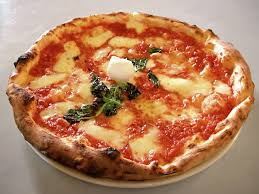

TEST 4:
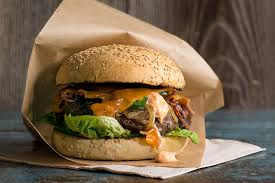

WYNIKI TESTU:

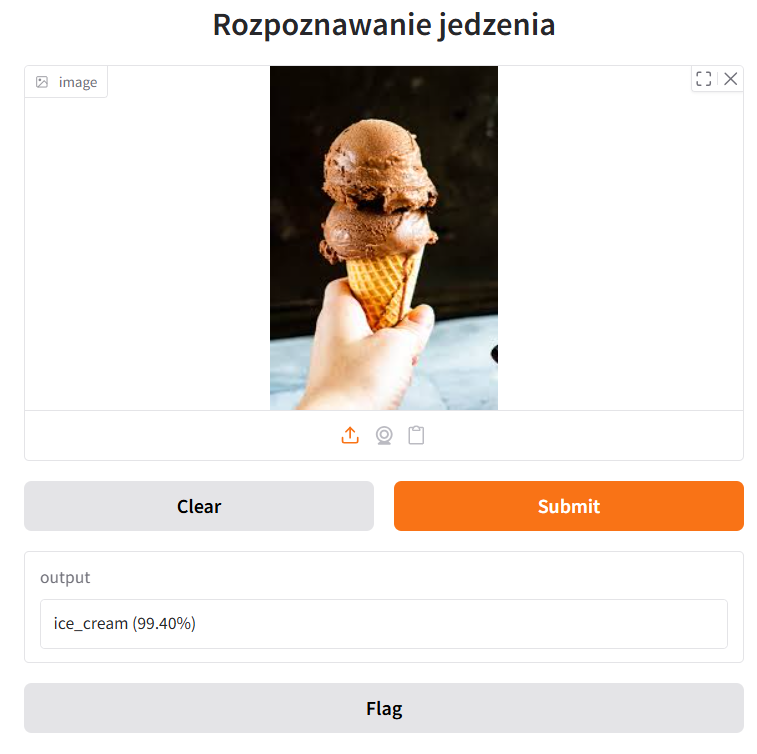

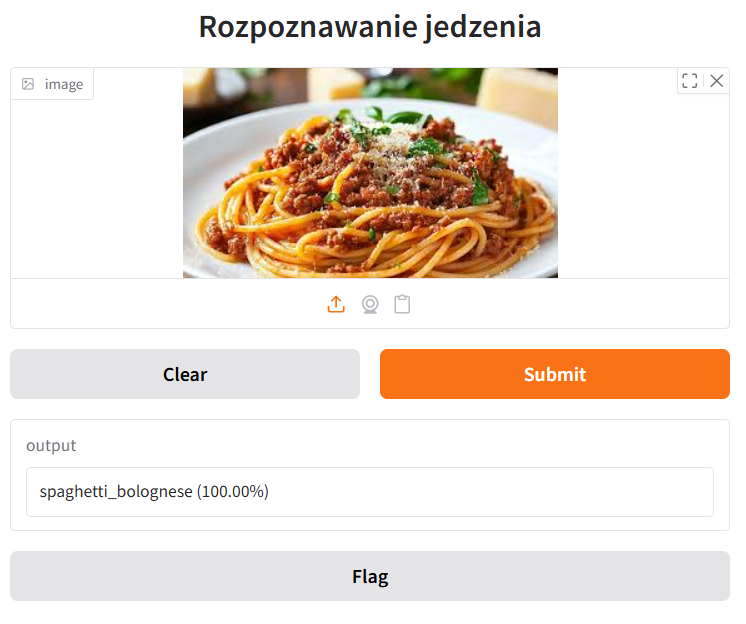


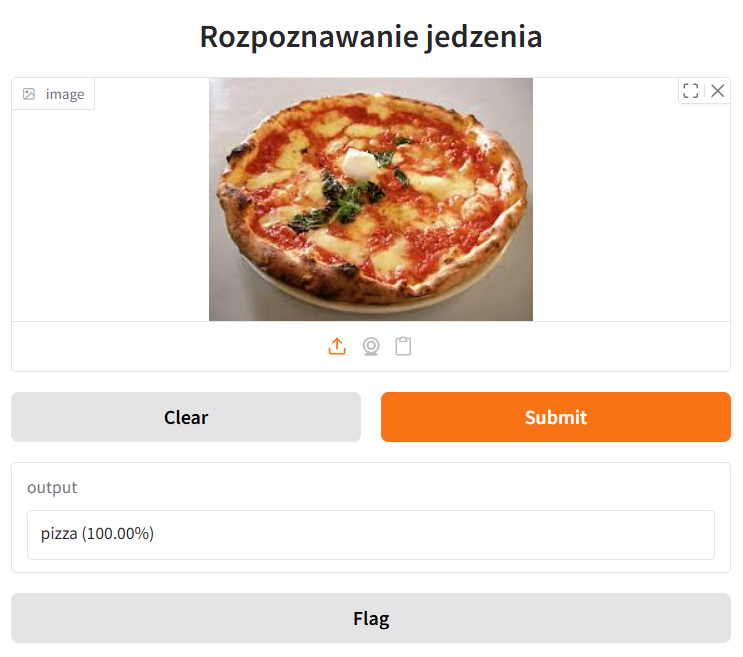


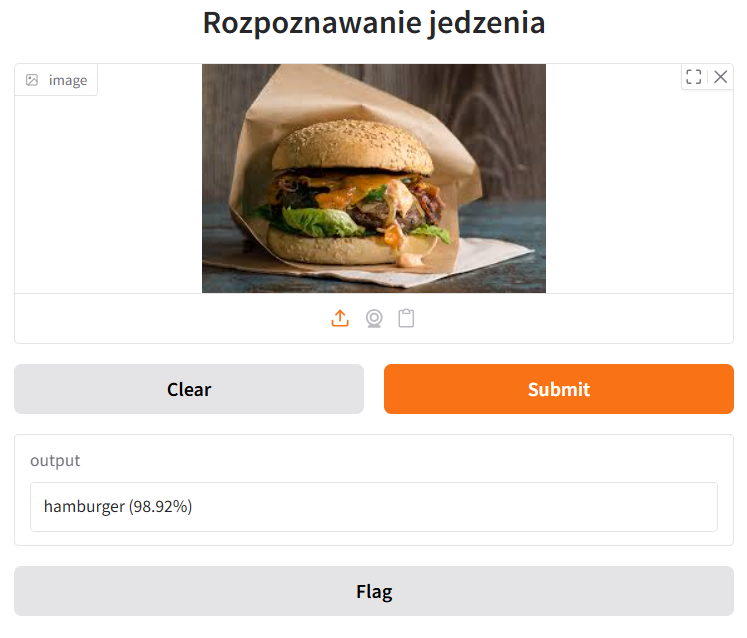


Nasze wyniki są wyjątkowo dobre.

Zdjęcia do testów są zdjęciami pobranymi z google.

Sprawdźmy czy aplikacja działa na telefonie i rozpozna zdjęcia z prywatnej kolekcji.

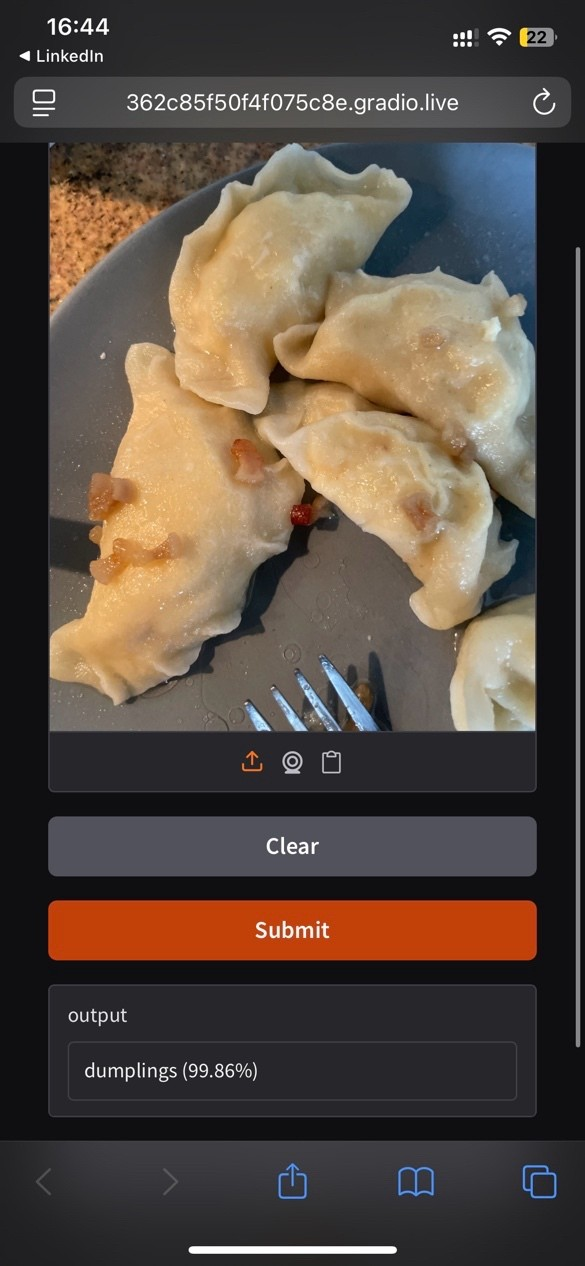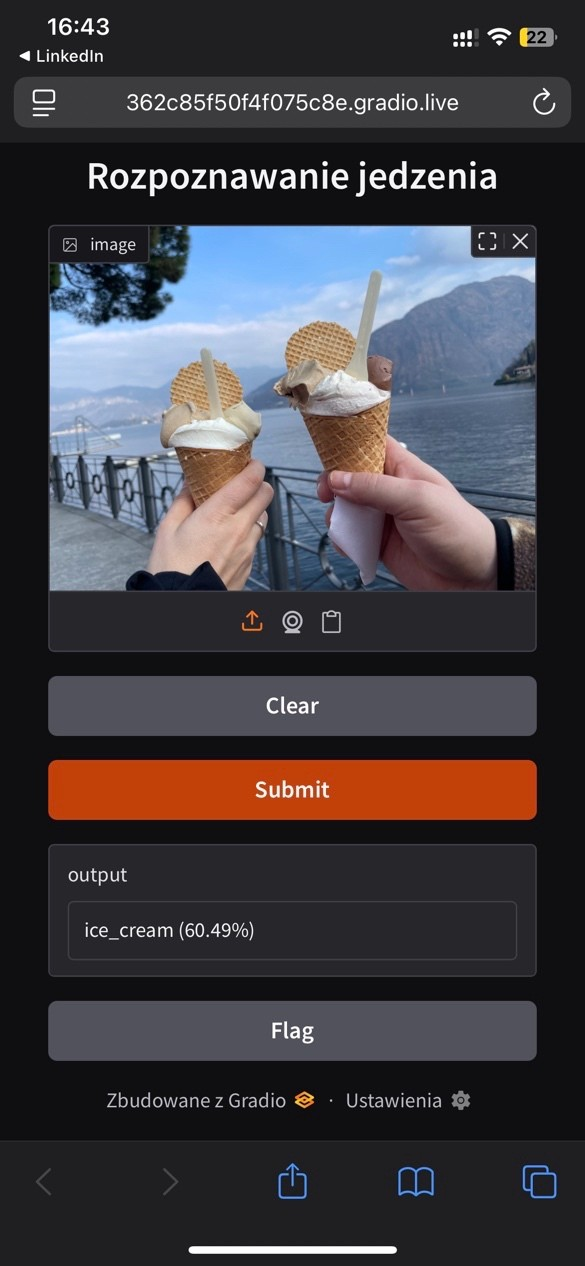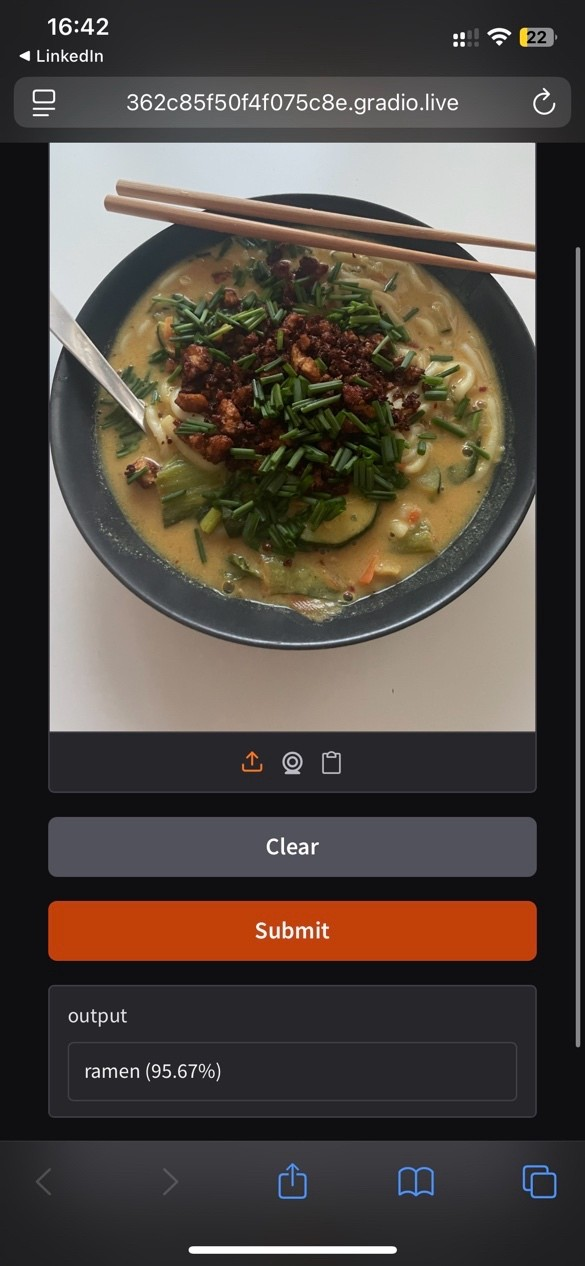

# PODSUMOWANIE:

Przykładowe testy (widoczne na załączonych zrzutach ekranu) pokazują wysoką skuteczność - model poprawnie rozpoznał m.in. lody, ramen i pierogi z dużą pewnością, przekraczającą często 90%.

Funkcjonalność ta stanowi podstawę do budowy wielu praktycznych rozwiązań.

### Potencjalne zastosowania:

**Cyfrowe menu restauracji / aplikacja kelnerska**

Klient lub obsługa może zeskanować danie na stole i uzyskać nazwę oraz szczegóły (składniki, kalorie).

**Asystent dla podróżujących**

Użytkownik może zrobić zdjęcie nieznanej potrawy za granicą (np. na bazarze w Azji) i dowiedzieć się, co je - bez znajomości lokalnego języka.

**Detektor jedzenia w miejscach publicznych**

System np. w galeriach handlowych, kinach czy muzeach może wykrywać niedozwolone jedzenie (np. lody, fast food).

**Integracja z robotem / kamerą inteligentną**

Kamera np. w food courcie może automatycznie klasyfikować potrawy na podstawie obrazu - np. do celów analitycznych lub logistycznych.

**Aplikacja edukacyjna dla dzieci i młodzieży**

Dziecko robi zdjęcie potrawy, a aplikacja uczy nazw, kategorii żywności lub daje ciekawostki o pochodzeniu dania.

**Wspomaganie rozpoznawania paragonów z jedzeniem (OCR + AI)**

System może wspierać analizę zakupów w aplikacjach dietetycznych - obraz potrawy + OCR ze skanu.

### **Dzięki udokumentowanemu działaniu w interfejsie Gradio, projekt pokazuje nie tylko skuteczność modelu, ale również jego gotowość do integracji z rzeczywistymi rozwiązaniami użytkowymi.**